# import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 만들기
- 원본 데이터가 월별로 나뉘어져있어, 하나의 csv파일로 만들기 위해 작성된 코드
- path부분은 'C:/Users/a0_0g/codeit_study/TransLab/Data/원본/' 각자 컴퓨터에 맞게 바꿔주세요!

In [ ]:
import pandas as pd
import os 

def merge_files(read_path: str, save_path: str, date_col: str) -> str:
    broken_file_path = read_path
    broken_data_dir = os.listdir(broken_file_path)
    print(f'원래 파일 폴더: {broken_data_dir}\n')

    df22 = pd.DataFrame()
    df23 = pd.DataFrame()
    for file in broken_data_dir:
        print(f'병합 진행중인 파일: {file}\n')
        try:
            # try csv
            df = pd.read_csv(f'{broken_file_path}/{file}', encoding='cp949')
        except:
            # else excel
            df = pd.read_excel(f'{broken_file_path}/{file}')
        # convert to datetime
        df[date_col] = pd.to_datetime(df[date_col])
        
        # if year 2022
        df22_new = df.loc[(df[date_col].dt.month.isin([month for month in range(6, 13)])) & (df[date_col].dt.year == 2022)]
        df22 = pd.concat([df22, df22_new], axis=0)
        df22 = df22.sort_values(by=date_col)
        
        # if year 2023
        df23_new = df.loc[(df[date_col].dt.month.isin([month for month in range(6, 13)])) & (df[date_col].dt.year == 2023)]
        df23 = pd.concat([df23, df23_new], axis=0)
        df23 = df23.sort_values(by=date_col)
    
    # save files
    df22.to_csv(f'{save_path}2207-12.csv', index=False)
    df23.to_csv(f'{save_path}2307-12.csv', index=False)
        
    return f'모든 파일 병합 완료.'
    
# 고장 데이터
read_path = 'C:/Users/a0_0g/codeit_study/TransLab/Data/원본/고장'
save_path = 'C:/Users/a0_0g/codeit_study/TransLab/Data/원본/고장신고내역(일별)_'
date_col = '등록일시'

merge_files(read_path, save_path, date_col)

# 대여이력정보 데이터
read_path = 'C:/Users/a0_0g/codeit_study/TransLab/Data/원본/대여'
save_path = 'C:/Users/a0_0g/codeit_study/TransLab/Data/원본/대여이력정보(일별)_'
date_col = '대여일시'

merge_files(read_path, save_path, date_col)

---
---

# 데이터불러오기
- 연도별 하반기로 합쳐진 원본 데이터 불러오기

In [4]:
df_newb = pd.read_csv('C:/Users/a0_0g/codeit_study/TransLab/Data/원본/신규가입자합산_22-23.csv')
df_rental_22 = pd.read_csv('C:/Users/a0_0g/codeit_study/TransLab/Data/원본/대여이력정보(일별)_2207-12.csv')
df_rental_23 = pd.read_csv('C:/Users/a0_0g/codeit_study/TransLab/Data/원본/대여이력정보(일별)_2307-12.csv')
df_broken_22 = pd.read_csv('C:/Users/a0_0g/codeit_study/TransLab/Data/원본/고장신고내역(일별)_2207-12.csv')
df_broken_23 = pd.read_csv('C:/Users/a0_0g/codeit_study/TransLab/Data/원본/고장신고내역(일별)_2307-12.csv')

In [5]:
df_broken = pd.concat([df_broken_22, df_broken_23], ignore_index = True)
df_rental = pd.concat([df_rental_22, df_rental_23], ignore_index = True)

In [ ]:
# from utils import pipe_newb, pipe_broken, pipe_rental

# df_newb = pipe_newb(df_newb)
# df_rental = pipe_rental(df_rental)
# df_broken = pipe_broken(df_broken)

---
---

# 데이터 전처리

## 1. newb data

### 1) 데이터확인

In [7]:
df_newb

,가입일시,가입건수,year
0,202207,56393,2022
1,202208,53853,2022
2,202209,81574,2022
3,202210,62511,2022
4,202211,36600,2022
5,202212,11530,2022
6,202307,42649,2023
7,202308,41346,2023
8,202309,61111,2023
9,202310,66836,2023


### 2) 타입 변환

- 가입일시 데이터타입 변환
    - 가입일시가 년월로 되어있어 바로 datetime으로 변환시 날짜가 제대로 나오지 않음.
    - period 사용하여 년-월 로 인식할 수 있게 바꿔준 후 year 제거.

In [8]:
df_newb['가입일시'] = (
    df_newb['가입일시']
    .astype('str')
    .apply(lambda x: x[:4] + '-' + x[4:])
    .apply(lambda x: pd.to_datetime(x)).dt.to_period('M')
)

df_newb.drop(columns=['year'], inplace=True)

### 최종데이터

In [9]:
df_newb

,가입일시,가입건수
0,2022-07,56393
1,2022-08,53853
2,2022-09,81574
3,2022-10,62511
4,2022-11,36600
5,2022-12,11530
6,2023-07,42649
7,2023-08,41346
8,2023-09,61111
9,2023-10,66836


---

## 2. broken data

### 1) 데이터 확인
- broken data 총 194,729건

In [10]:
df_broken.head(5)

,자전거번호,등록일시,고장구분
0,SPB-30229,2022-07-01 00:44:33,페달
1,SPB-40134,2022-07-01 00:57:59,페달
2,SPB-40789,2022-07-01 01:08:25,안장
3,SPB-50932,2022-07-01 01:09:33,체인
4,SPB-41175,2022-07-01 01:13:06,안장


In [11]:
df_broken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194729 entries, 0 to 194728
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   자전거번호   194729 non-null  object
 1   등록일시    194729 non-null  object
 2   고장구분    194729 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


### 2) 타입 변환
- 등록일시가 년월일시간으로 되어있어 datetime으로 변환

In [13]:
df_broken['등록일시'] = pd.to_datetime(df_broken['등록일시'])

In [14]:
df_broken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194729 entries, 0 to 194728
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   자전거번호   194729 non-null  object        
 1   등록일시    194729 non-null  datetime64[ns]
 2   고장구분    194729 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.5+ MB


### 3) 중복값 확인

- 중복값 1개 존재
    - 자전거번호, 등록일시, 고장구분이 똑같은 데이터 존재
    - 해당 데이터를 확인해보았을 때, 시스템상 오류로 같은 데이터가 두 번들어간 것으로 보여 제거

In [15]:
df_broken.duplicated().sum()

np.int64(1)

In [16]:
df_broken.drop_duplicates(inplace = True)

### 최종데이터
- broken data 총 194,728건

In [17]:
df_broken.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194728 entries, 0 to 194728
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   자전거번호   194728 non-null  object        
 1   등록일시    194728 non-null  datetime64[ns]
 2   고장구분    194728 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 5.9+ MB


---

## 3. rental data

### 1) 데이터 확인

- rentaldata 총 47,375,277

In [18]:
df_rental.head(5)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-39460,2022-07-01 00:00:09,1124,발산역 6번 출구 뒤,0,2022-07-01 00:05:21,01180,마곡엠밸리 15단지(1502동) 건너편,0,5,774.45,2002,\N,내국인,ST-522,ST-1517,NaN
1,SPB-34271,2022-07-01 00:00:10,296,KT플라자 영등포점,0,2022-07-01 00:07:46,03202,당산롯데캐슬프레스티지,0,7,297.65,2003,F,내국인,ST-1968,ST-1973,NaN
2,SPB-31521,2022-07-01 00:00:13,347,동대문역사문화공원역 9번출구 앞,0,2022-07-01 00:08:19,00455,종로6가역 버스정류장(동대문 방향),0,8,995.92,1990,\N,내국인,ST-163,ST-1608,NaN
3,SPB-43216,2022-07-01 00:00:16,2824,미래사랑어린이공원 앞,0,2022-07-01 00:23:51,01907,구일우성(아) 육교 밑,0,23,3356.68,1985,M,내국인,ST-1964,ST-665,NaN
4,SPB-59945,2022-07-01 00:00:17,2620,송파나루역 4번 출구옆,0,2022-07-01 00:09:58,04486,홈플러스 잠실점,0,9,1360.00,2000,M,내국인,ST-1730,ST-2596,NaN


In [19]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47375277 entries, 0 to 47375276
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 6.0+ GB


### 1) 중복값 확인
- 존재하지 않음.

In [22]:
df_rental.duplicated().sum()

np.int64(338)

### 2) 1차 변수 선별
- 사용하지않는 변수제거

In [20]:
df_rental.drop(columns=['자전거구분', '성별', '대여거치대', '반납일시', '반납거치대', '대여 대여소번호', '대여 대여소명', '반납대여소번호', '반납대여소명'], inplace=True)

### 3) 타입변환
- 대여일시 년월일시간으로 되어있어 datetime타입으로 변환

In [21]:
df_rental['대여일시'] = pd.to_datetime(df_rental['대여일시'])

### 4) 결측치 확인

- 결측치가 '\N'으로 들어가있어서 변환

In [23]:
df_rental.replace('\\N', np.nan, inplace=True)

- 당시(22년도, 23년도) 회원의 나이가 필요하기때문에 '생년' 결측치 제외

In [24]:
df_rental.dropna(subset = ['생년'], inplace = True)

- '반납대여소ID' 결측치 제외
    - 반납시간은 존재하지만 반납대여소ID가 없는 경우가 있음.
    - 이 경우 시스템오류 & 사용자가 직접 반납이 되지 않은 경우 강제반납프로세스를 통해 반납처리가 된 경우라고 확인됨. <br/>
    -> 어떤 경우로 처리가 되었는지 알 수 없으므로 오류로 분류하여 제외

In [25]:
df_rental.dropna(subset = ['반납대여소ID'], inplace = True)

### 6) 이상치 제외

- 이용자 종류
    - 이용자 종류에서 외국인 제외
    - 외국인의 경우 내국인에 비해 긴 시간동안 이용해 서울 관광이 중심인 것을 확인할 수 있음. <br/>
        -> 따라서 버스와 지하철 요금인상에 영향을 받지 않으므로 제외

In [26]:
df_rental = df_rental[df_rental['이용자종류'] != '외국인']

- 나이 조건
    - 따릉이의 경우 만 14세부터 사용할 수 있고, 버스와 지하철의 경우 65세이후는 무료탑승
    - 만14세이상 만65세미만 데이터 사용
        - 2022년 기준: 만 14세 2008년생, 만 64세 1958년생
        - 2023년 기준: 만 14세 2009년생, 만 64세 1959년생

In [27]:
df_rental['나이(만)'] = df_rental['대여일시'].dt.year - df_rental['생년'].astype('int')

In [28]:
df_rental = df_rental[(df_rental['나이(만)'] >= 14) & (df_rental['나이(만)'] <= 64)]

- 이용거리(M), 이용시간(분)
    - 이용거리(M), 이용시간(분)이 0인 경우 오류
    - 이용거리(M) 1km(1000m)이상 15km(15000m)이하 / 이용시간(분) 5분이상 60분이하
        - 실제 버스와 지하철 대신 따릉이를 사용한다면 실제 사용할 시간과 거리를 생각해봄.
        - 따릉이를 1시간이상 타게되면 버스와 지하철대신 타는 것보다 요금이 비싸짐
        - 대체로 출퇴근시간대에 집중되어있고, 단거리에 많이 사용하며, 평균적으로 걸리는 시간과 거리를 고려함.
    

In [29]:
df_rental = df_rental[(df_rental['이용거리(M)'] >= 1000) & (df_rental['이용거리(M)'] <= 15000)]

In [30]:
df_rental = df_rental[(df_rental['이용시간(분)'] >= 5) & (df_rental['이용시간(분)'] <= 60)]

### 7) 2차변수 제거
- 이상치제거, 파생변수 만든 후 변수 제거

In [31]:
df_rental.drop(columns=['생년', '이용자종류'], inplace=True)

### 최종데이터
- rentaldata 총 24,872,129건

In [32]:
df_rental.head(5)

,자전거번호,대여일시,이용시간(분),이용거리(M),대여대여소ID,반납대여소ID,나이(만)
3,SPB-43216,2022-07-01 00:00:16,23,3356.68,ST-1964,ST-665,37
4,SPB-59945,2022-07-01 00:00:17,9,1360.00,ST-1730,ST-2596,22
5,SPB-41020,2022-07-01 00:00:20,12,1848.00,ST-1136,ST-1120,55
6,SPB-60168,2022-07-01 00:00:20,6,1510.00,ST-1462,ST-1135,28
7,SPB-63298,2022-07-01 00:00:22,18,1700.00,ST-3029,ST-639,30


In [33]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24872129 entries, 3 to 47375275
Data columns (total 7 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일시     datetime64[ns]
 2   이용시간(분)  int64         
 3   이용거리(M)  float64       
 4   대여대여소ID  object        
 5   반납대여소ID  object        
 6   나이(만)    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 1.5+ GB


---
---

# EDA

In [ ]:
df_newb_groupby = (
    df_newb
    .groupby([df_newb['가입일시'].dt.year.rename('year'), df_newb['가입일시'].dt.month.rename('month')])
    .agg({'가입건수':'sum'})
    .reset_index()
    .sort_values(by=['year', 'month'])  # 연도와 월별로 정렬
    .assign(
        가입_변화량=lambda x: x.groupby('year')['가입건수'].pct_change().fillna(0)  # 각 연도별로 변화량 계산
    )
)

In [ ]:
df_rental_groupby = (
    df_rental
    .groupby([df_rental['대여일시'].dt.year.rename('year'), df_rental['대여일시'].dt.month.rename('month')])
    .agg({'자전거번호': 'size'})
    .reset_index()
    .sort_values(by=['year', 'month'])  # 연도와 월별로 정렬
    .assign(
        대여_변화량=lambda x: x.groupby('year')['자전거번호'].pct_change().fillna(0)  # 연도별로 변화량 계산
    )
)

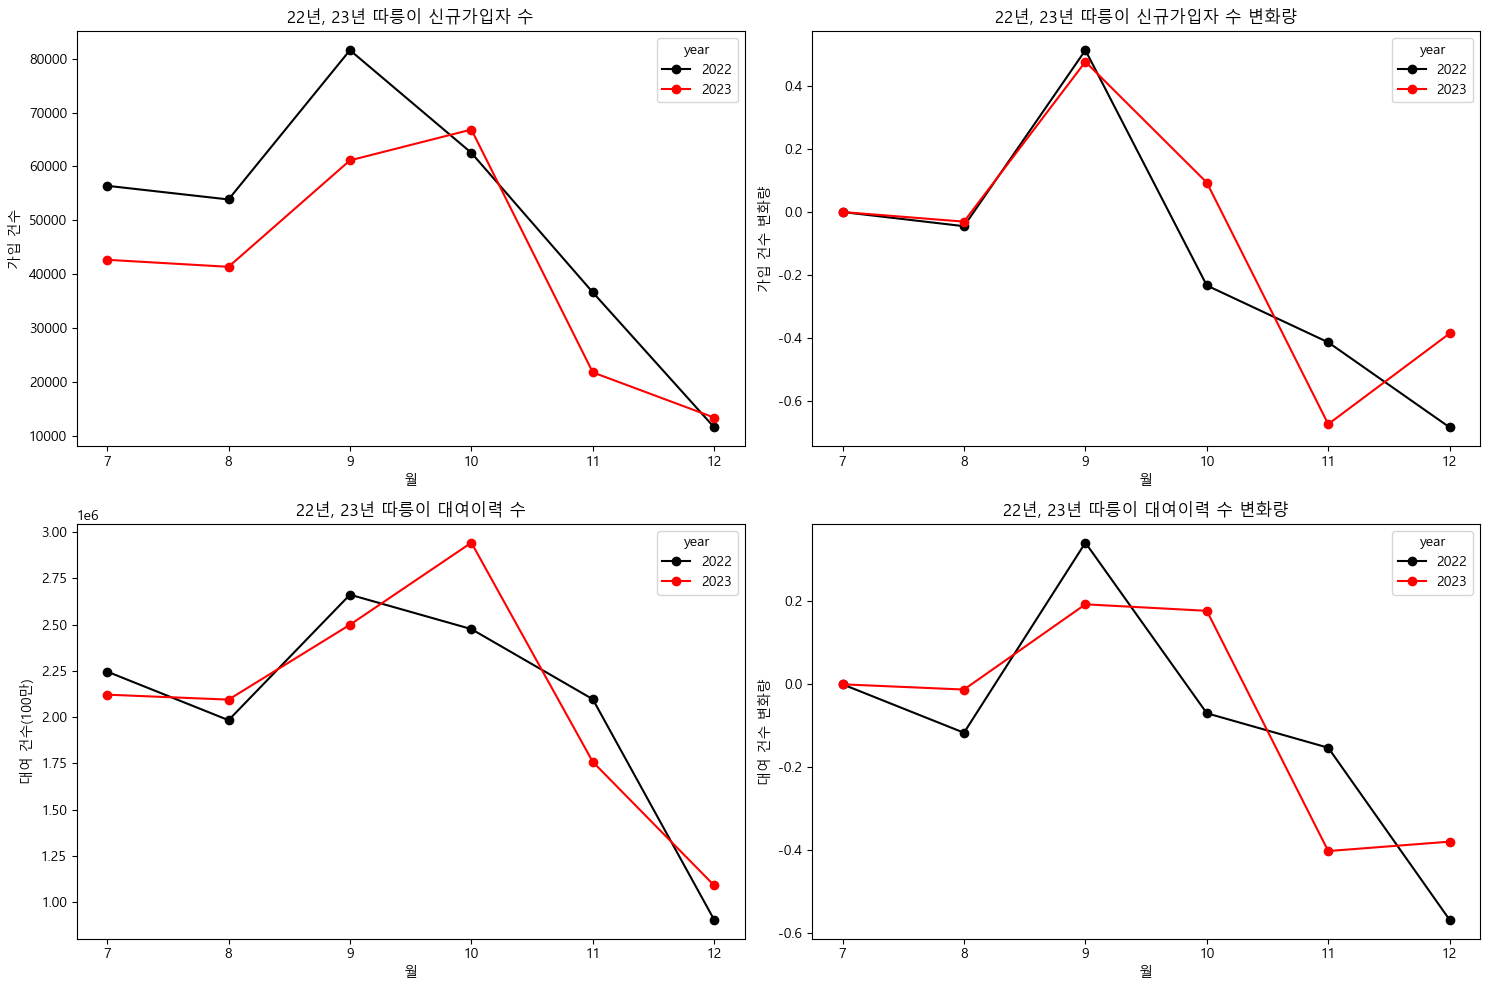

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

df_newb_groupby.pivot(index='month', columns='year', values='가입건수').plot(kind='line', ax=axs[0, 0], marker='o', color=['black', 'red'])
axs[0, 0].set_title('22년, 23년 따릉이 신규가입자 수')
axs[0, 0].set_xlabel('월')
axs[0, 0].set_ylabel('가입 건수')

df_newb_groupby.pivot(index='month', columns='year', values='가입_변화량').plot(kind='line', ax=axs[0, 1], marker='o', color=['black', 'red'])
axs[0, 1].set_title('22년, 23년 따릉이 신규가입자 수 변화량')
axs[0, 1].set_xlabel('월')
axs[0, 1].set_ylabel('가입 건수 변화량')

df_rental_groupby.pivot(index='month', columns='year', values='자전거번호').plot(kind='line', ax=axs[1, 0], marker='o', color=['black', 'red'])
axs[1, 0].set_title('22년, 23년 따릉이 대여이력 수')
axs[1, 0].set_xlabel('월')
axs[1, 0].set_ylabel('대여 건수(100만)')

df_rental_groupby.pivot(index='month', columns='year', values='대여_변화량').plot(kind='line', ax=axs[1, 1], marker='o', color=['black', 'red'])
axs[1, 1].set_title('22년, 23년 따릉이 대여이력 수 변화량')
axs[1, 1].set_xlabel('월')
axs[1, 1].set_ylabel('대여 건수 변화량')

plt.tight_layout()
plt.show()

- 신규가입자, 대여이력(사용량)의 증가추이는 교통요금 인상에 따라 증가한 것으로 보인다.
- 8월부터 10월까지의 변경추이를 봤을 때, 신규 가입자의 변동폭이 크다는 것을 확인할 수 있었고, 이는 관심이 많이졌다라고 해석하였다.
- 실제 정책은 8월 12일경 시행이 되었으나, 그에 대한 체감을 하기 위한 기간이 필요하다 생각하였다. <br/>
2023년은 증가하지만, 2022년은 감소하는 그래프를 보았을 때, 실제 한달 뒤 9월에 결과가 반영되었다고 생각하였다.
- 2022년도에 신규가입 이벤트가 있어 사용자가 증가한 것으로 보인다. (https://blog.naver.com/haechiseoul/222796491924)

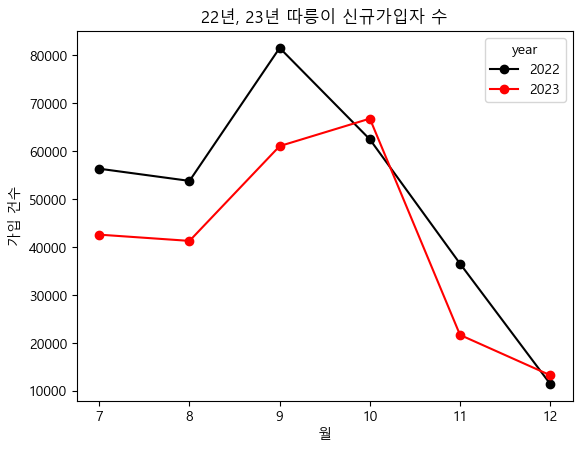

In [ ]:
ax = df_newb_groupby.pivot(index='month', columns='year', values='가입건수').plot(kind='line', marker='o', color=['black', 'red'])
ax.set_title('22년, 23년 따릉이 신규가입자 수')
ax.set_xlabel('월')
ax.set_ylabel('가입 건수')

plt.show()

In [ ]:
broken_counts = (
    df_broken
    .groupby([df_broken['등록일시'].dt.year.rename('year'), df_broken['등록일시'].dt.month.rename('month')])
    .agg({'자전거번호' : 'size'})
    .reset_index()
    .assign(
        고장_변화량=lambda x: x.groupby('year')['자전거번호'].pct_change().fillna(0)  # 연도별로 변화량 계산
    )
)

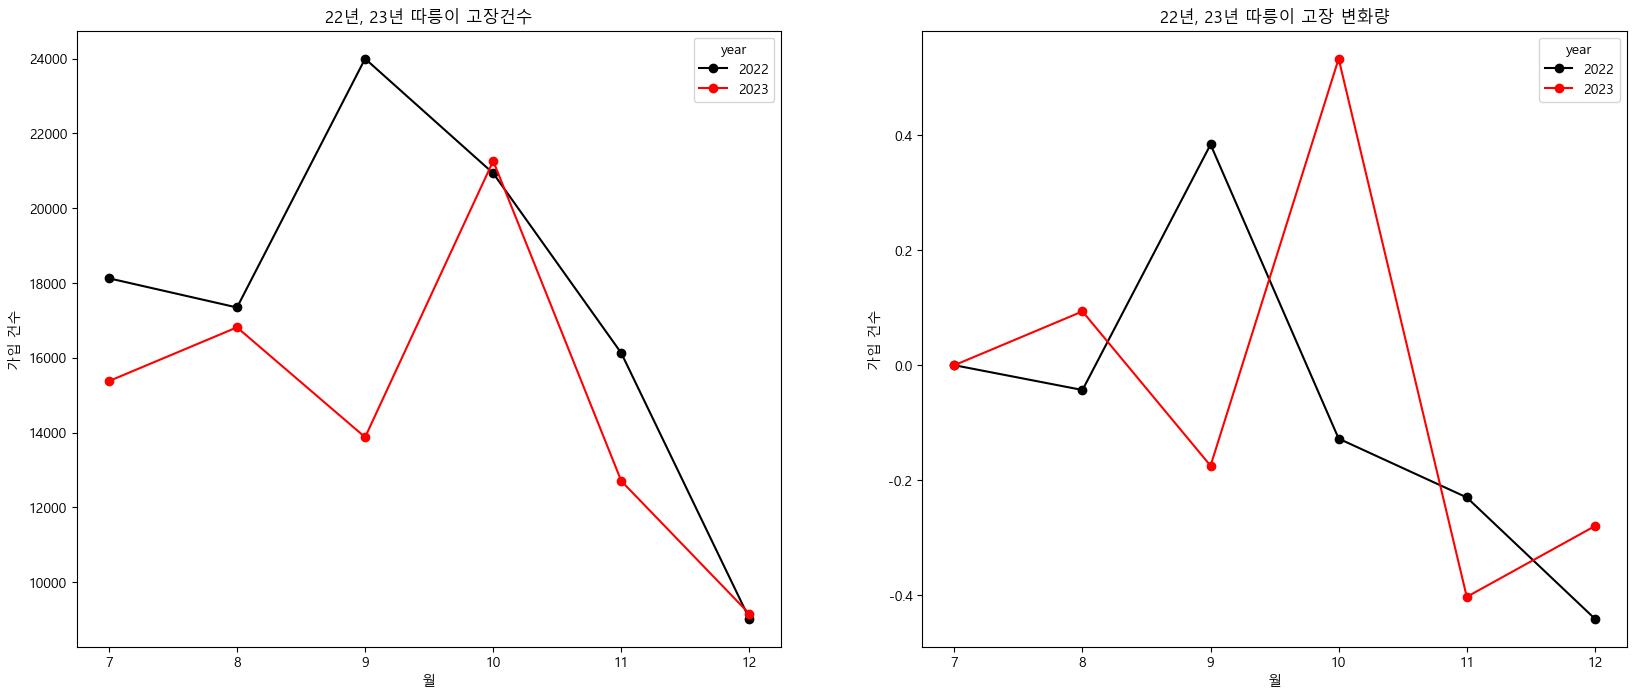

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

broken_counts.pivot(index='month', columns='year', values='자전거번호').plot(kind='line', ax=axs[0], marker='o', color=['black', 'red'])
axs[0].set_title('22년, 23년 따릉이 고장건수')
axs[0].set_xlabel('월')
axs[0].set_ylabel('가입 건수')

broken_counts.pivot(index='month', columns='year', values='고장_변화량').plot(kind='line', ax=axs[1], marker='o', color=['black', 'red'])
axs[1].set_title('22년, 23년 따릉이 고장 변화량')
axs[1].set_ylabel('가입 건수')
axs[1].set_xlabel('월')

plt.show()

- 월별 고장 신고 횟수가 2022년도 2023년도에 9월에 큰 차이를 보인다. <br/>
-> 외부적인 요인이 발생했을 가능성을 찾아봐야할 것 같다. (예를 들어, 따릉이 측의 고장 전수조사를 통한 고장 신고량 증가)